# ybigta & P-SAT combined session project

## 대출데이터 분석


In [1]:
import pandas_profiling
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 
sns.set_palette = "xkcd_rgb"

In [2]:
pd.set_option("display.max_rows", 500)

## Data Import

- application_train : 성별, 수입, 교육수준 등 대출상품 등록 시 입력 정보
- bureau : 타 금융기관이 신용평가사에 보고한 고객의 과거 신용 정보
- bureau_balance : 신용평가사의 과거 신용 잔액 정보 
- credit_card_balance : 신청자가 가지고 있는 신용 카드의 과거 월별 잔액
- installmetns_payments : 이전에 지출한 상환 내역
- POS_CASH_balance : POS(판매 시점) 및 현금 대출의 과거 월별 잔액
- previous_application : 과거 대출상품 이용 기록

In [3]:
application_train = pd.read_csv("default/application_train.csv")
bureau = pd.read_csv("default/bureau.csv")
bureau_balance = pd.read_csv("default/bureau_balance.csv")
credit_card_balance = pd.read_csv("default/credit_card_balance.csv")
installments_payments = pd.read_csv("default/installments_payments.csv")
POS_CASH_balance = pd.read_csv("default/POS_CASH_balance.csv")
previous_application = pd.read_csv("default/previous_application.csv")

## 변수 선택 및 확인
- 주관적으로 필요한 변수에 대해서 정리하여 만들어냄. 추후 EDA를 끝내고 다른 방법들을 이용하여 변수의 중요도에 대한 판단을 추가할 예정

## EDA for application_train data

In [5]:
Check_NA = pd.DataFrame(application_train.isna().sum(), columns= ["count_NA"])
Check_NA["ratio_NA"] = round(application_train.isna().sum()/len(application_train)*100,3)
Check_NA

,count_NA,ratio_NA
SK_ID_CURR,0,0.000
TARGET,0,0.000
NAME_CONTRACT_TYPE,0,0.000
CODE_GENDER,0,0.000
FLAG_OWN_CAR,0,0.000
FLAG_OWN_REALTY,0,0.000
CNT_CHILDREN,0,0.000
AMT_INCOME_TOTAL,0,0.000
AMT_CREDIT,0,0.000
AMT_ANNUITY,12,0.004


In [6]:
application_train.info()
application_train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280205 entries, 0 to 280204
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 260.8+ MB


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
application_train.head().T

,0,1,2,3,4
SK_ID_CURR,100003,100004,100006,100007,100008
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,M,M
FLAG_OWN_CAR,N,Y,N,N,N
FLAG_OWN_REALTY,N,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,270000,67500,135000,121500,99000
AMT_CREDIT,1.2935e+06,135000,312682,513000,490496
AMT_ANNUITY,35698.5,6750,29686.5,21865.5,27517.5


#### 파일 확인 
- application_train 데이터는 280205개의 행, 122개의 열로 구성된 데이터

### 변수 확인  by 시각화

- NAME_CONTRACT_TYPE : Identification if loan is cash or revolving 
- 2개의 범주로 구성된 범주형 변수
- 대출의 종류에 따라 유의미한 결과를 도출할 것으로 보임
- Cash loans 대출이 대다수를 차지한 것으로 보임

NAME_CONTRACT_TYPE
Cash loans         4.800778
Revolving loans    3.111298
Name: NAME_CONTRACT_TYPE, dtype: float64

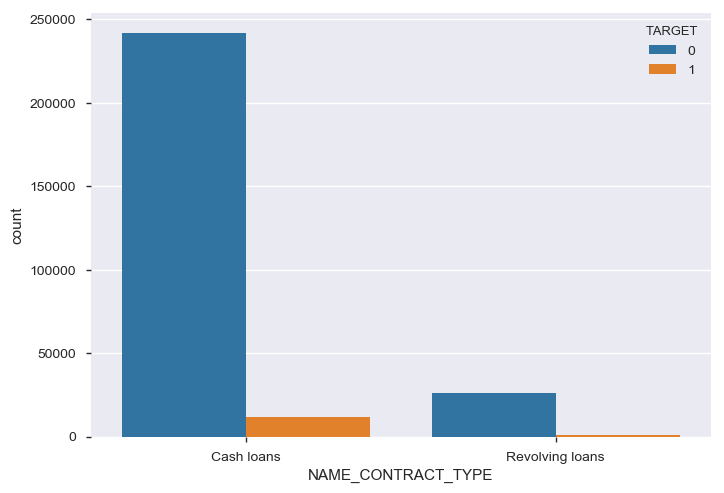

In [8]:
sns.countplot("NAME_CONTRACT_TYPE", hue="TARGET", data = application_train)
application_train.groupby("TARGET")["NAME_CONTRACT_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_CONTRACT_TYPE"].value_counts()[0]*100

- CODE_GENDER	: Gender of the client
- 성별로 구성된 범주형 자료
- XNA의 경우 NA로 판단되며 3개의 데이터가 존재

CODE_GENDER
F      3.973703
M      5.953059
XNA         NaN
Name: CODE_GENDER, dtype: float64

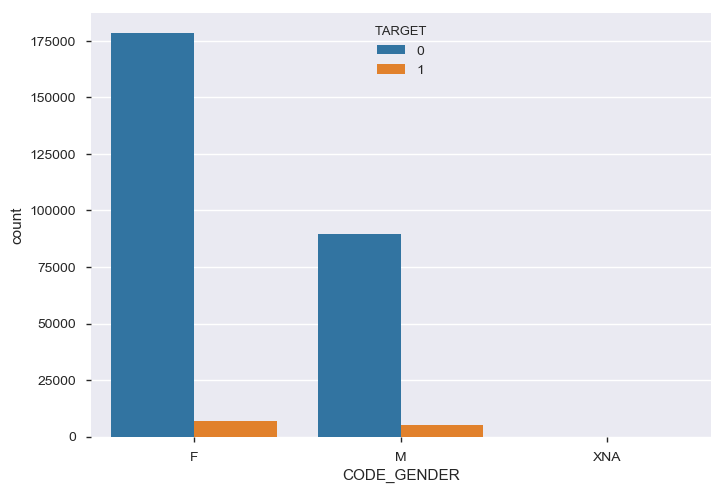

In [9]:
sns.countplot("CODE_GENDER", hue = "TARGET", data= application_train)
application_train.groupby("TARGET")["CODE_GENDER"].value_counts()[1]/application_train.groupby("TARGET")["CODE_GENDER"].value_counts()[0]*100

In [10]:
# XNA 개수 확인
len(application_train[lambda x: x["CODE_GENDER"]=="XNA"])

3

- FLAG_OWN_CAR : Flag if the client owns a car
- YES(Y), NO(N)로 구성된 범주형 변수

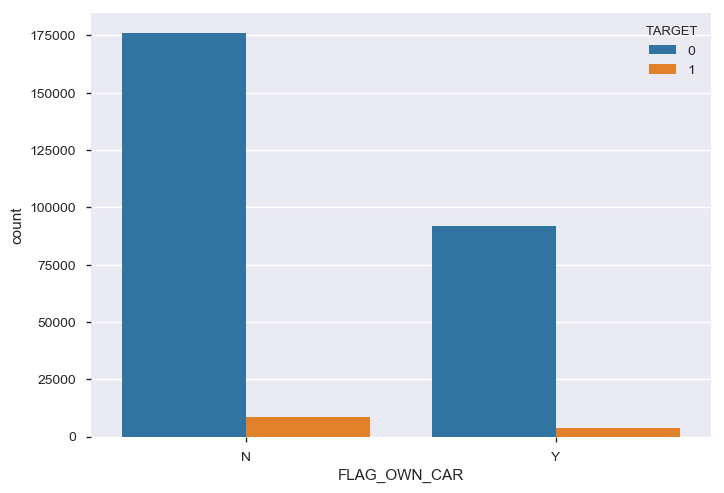

In [11]:
sns.countplot("FLAG_OWN_CAR", hue = "TARGET", data= application_train)

In [12]:
application_train.groupby("TARGET")["FLAG_OWN_CAR"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_OWN_CAR"].value_counts()[0]*100

FLAG_OWN_CAR
N    4.932909
Y    4.065846
Name: FLAG_OWN_CAR, dtype: float64

- FLAG_OWN_REALTY : Flag if client owns a house or flat
- YES(Y), NO(N)로 구성된 범주형 변수

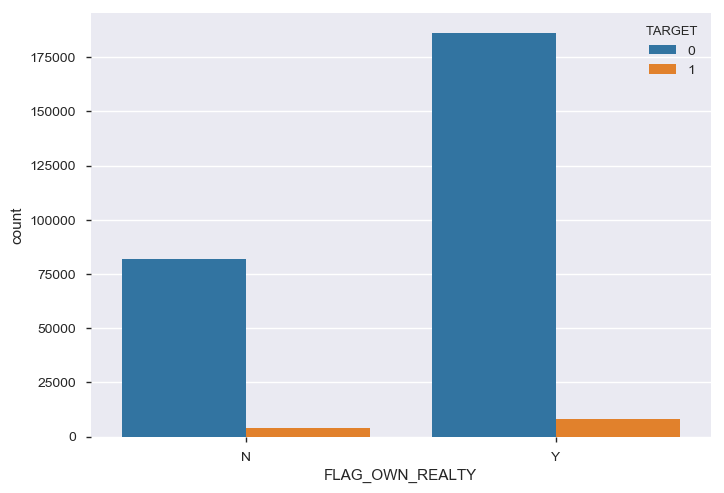

In [13]:
sns.countplot("FLAG_OWN_REALTY", hue = "TARGET", data= application_train)

In [14]:
application_train.groupby("TARGET")["FLAG_OWN_REALTY"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_OWN_REALTY"].value_counts()[0]*100

FLAG_OWN_REALTY
Y    4.510013
N    4.920076
Name: FLAG_OWN_REALTY, dtype: float64

- CNT_CHILDREN	Number of children the client has
- int형 자료

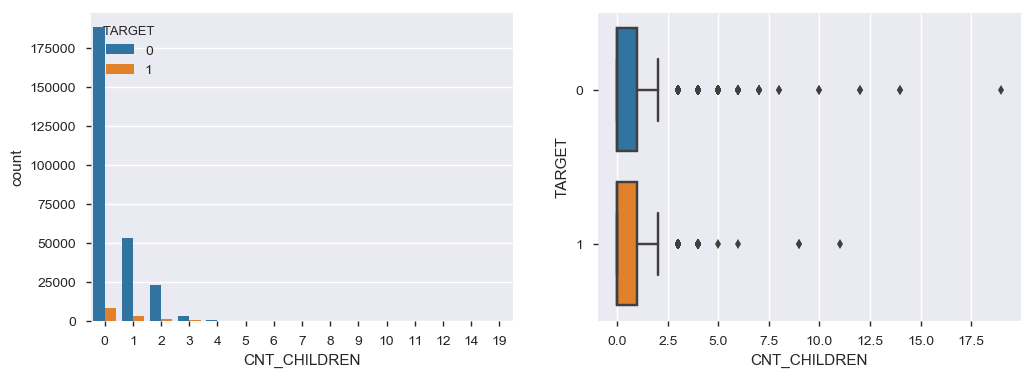

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot("CNT_CHILDREN", hue = "TARGET", data = application_train, ax=ax1)
sns.boxplot(x="CNT_CHILDREN", y="TARGET", data= application_train, ax=ax2, orient="h")

In [16]:
application_train.groupby("TARGET")["CNT_CHILDREN"].value_counts()

TARGET  CNT_CHILDREN
0       0               188224
        1                52815
        2                23120
        3                 3179
        4                  354
        5                   71
        6                   14
        7                    6
        8                    2
        10                   2
        12                   2
        14                   2
        19                   1
1       0                 8327
        1                 2728
        2                 1147
        3                  182
        4                   24
        9                    2
        5                    1
        6                    1
        11                   1
Name: CNT_CHILDREN, dtype: int64

- AMT_INCOME_TOTAL : Income of the client
- 수치형 자료
- 숫자 단위가 크다보니 격차가 매우 크게 나타나 그림이 잘 그려지지 않는 것을 확인할 수 있음 / 변수변환?
- 로그변환의 경우는 0 값이 존재하여 변환이 불가능함. 다른 scaler를 이용해야할듯.



C:\Users\hawi7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


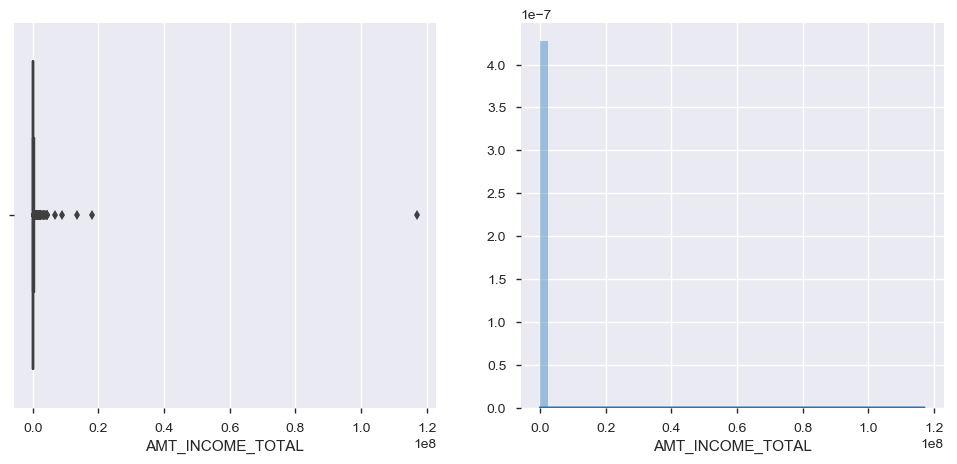

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize = (12, 5))
sns.boxplot(application_train.AMT_INCOME_TOTAL, ax=ax1)
sns.distplot(application_train.AMT_INCOME_TOTAL, ax=ax2)

C:\Users\hawi7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


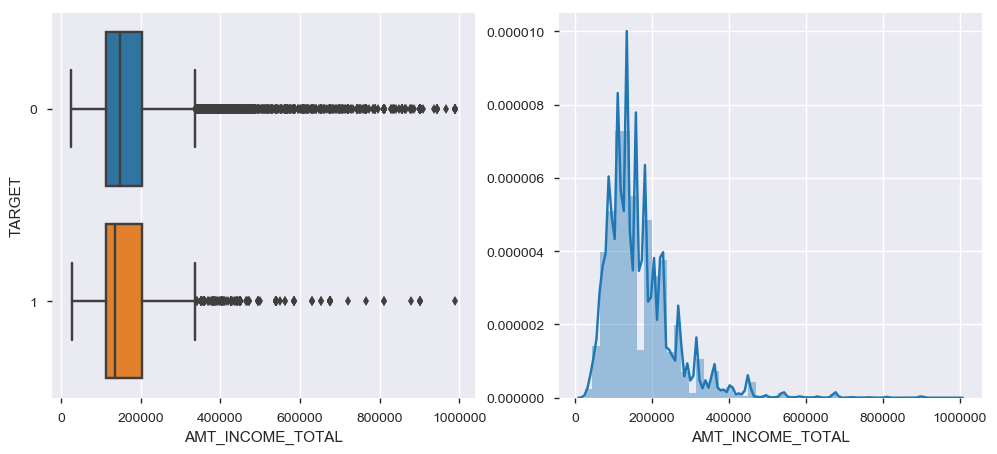

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize = (12, 5))
sns.boxplot(x = "AMT_INCOME_TOTAL", y = "TARGET", ax=ax1, data=application_train[lambda x:x["AMT_INCOME_TOTAL"]<1000000], orient = "h")
sns.distplot(application_train[lambda x:x["AMT_INCOME_TOTAL"]<1000000].AMT_INCOME_TOTAL, ax=ax2)

- AMT_CREDIT : Credit amount of the loan(자산)
- 수치형 자료

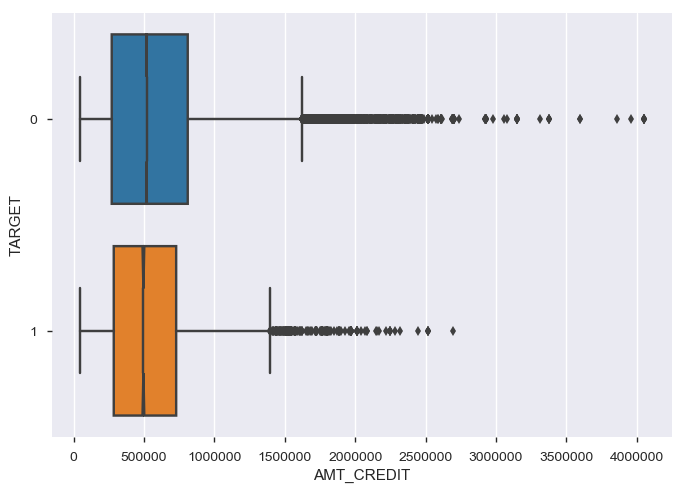

In [19]:
sns.boxplot(y = "TARGET", x = "AMT_CREDIT", data = application_train, notch = True , orient = "h")

- AMT_ANNUITY : Loan annuity  
- 수치형 자료

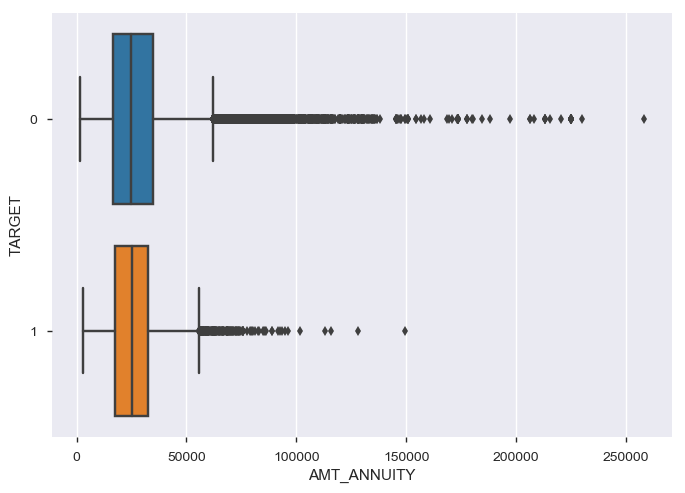

In [20]:
sns.boxplot(y = "TARGET", x= "AMT_ANNUITY", data = application_train, orient = "h")

- AMT_GOODS_PRICE :	For consumer loans it is the price of the goods for which the loan is given
- 수치형 자료

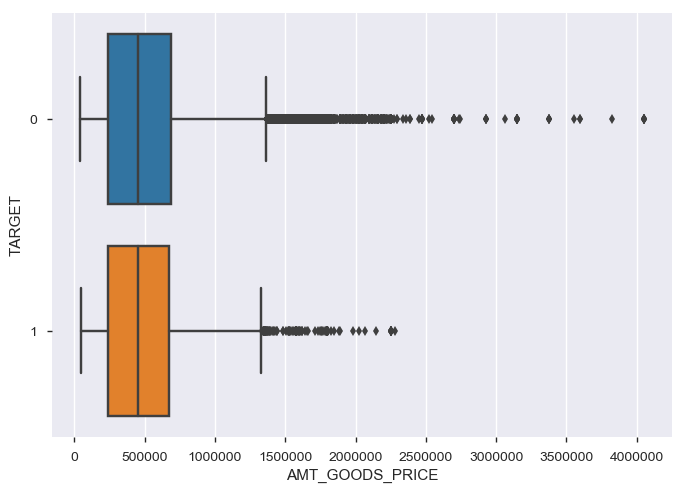

In [21]:
sns.boxplot(y= "TARGET", x = "AMT_GOODS_PRICE", data = application_train, orient= "h")

- NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan
- categorical data

NAME_TYPE_SUITE
Unaccompanied      4.709050
Family             4.258402
Spouse, partner    4.586694
Children           4.086622
Other_B            5.335968
Other_A            5.138340
Group of people    5.462185
Name: NAME_TYPE_SUITE, dtype: float64

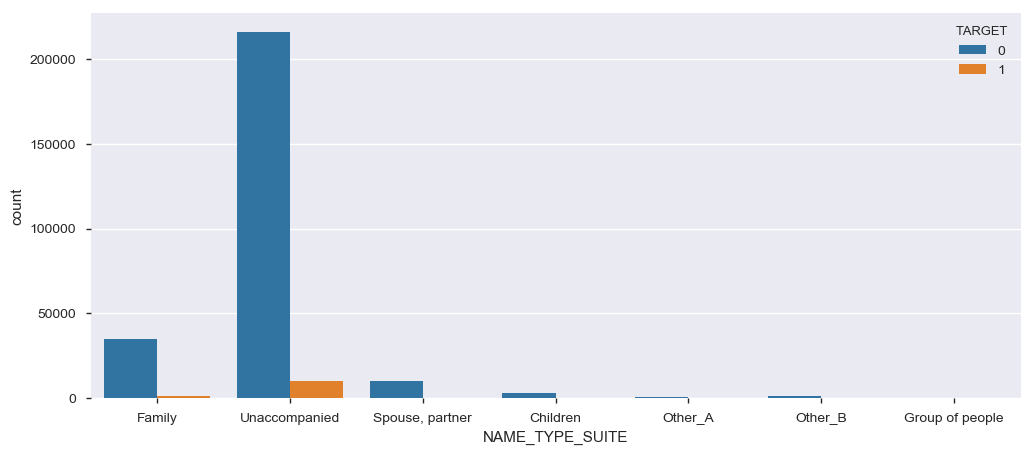

In [22]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_TYPE_SUITE", data = application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_TYPE_SUITE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_TYPE_SUITE"].value_counts()[0]*100

- NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave, etc.
- 범주형 자료

NAME_INCOME_TYPE
Businessman                   NaN
Commercial associate     4.246464
Maternity leave         33.333333
Pensioner                2.997561
State servant            3.255718
Student                       NaN
Unemployed              21.428571
Working                  5.607305
Name: NAME_INCOME_TYPE, dtype: float64

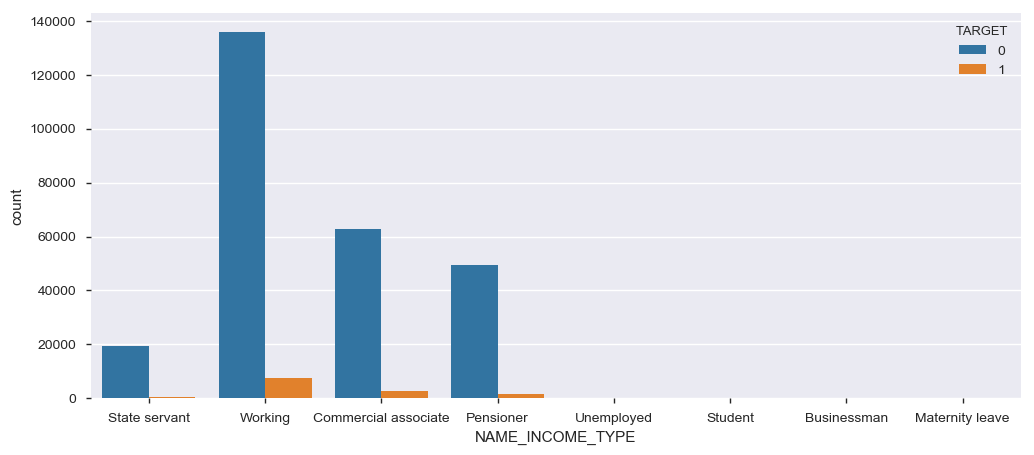

In [23]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_INCOME_TYPE", data = application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_INCOME_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_INCOME_TYPE"].value_counts()[0]*100

- NAME_EDUCATION_TYPE : Level of highest education the client achieved
- 범주형 자료

NAME_EDUCATION_TYPE
Secondary / secondary special    5.164748
Higher education                 3.040878
Incomplete higher                4.719631
Lower secondary                  6.811820
Academic degree                  0.645161
Name: NAME_EDUCATION_TYPE, dtype: float64

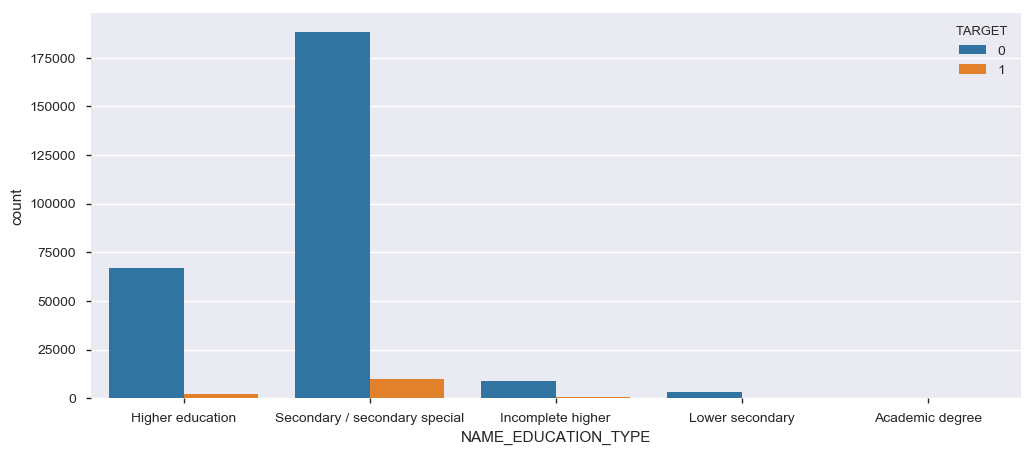

In [24]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_EDUCATION_TYPE", data= application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts()[0]*100

- NAME_FAMILY_STATUS : Family status of the client
- 범주형 자료

NAME_FAMILY_STATUS
Civil marriage          5.734866
Married                 4.304445
Separated               4.733762
Single / not married    5.825643
Unknown                      NaN
Widow                   3.317998
Name: NAME_FAMILY_STATUS, dtype: float64

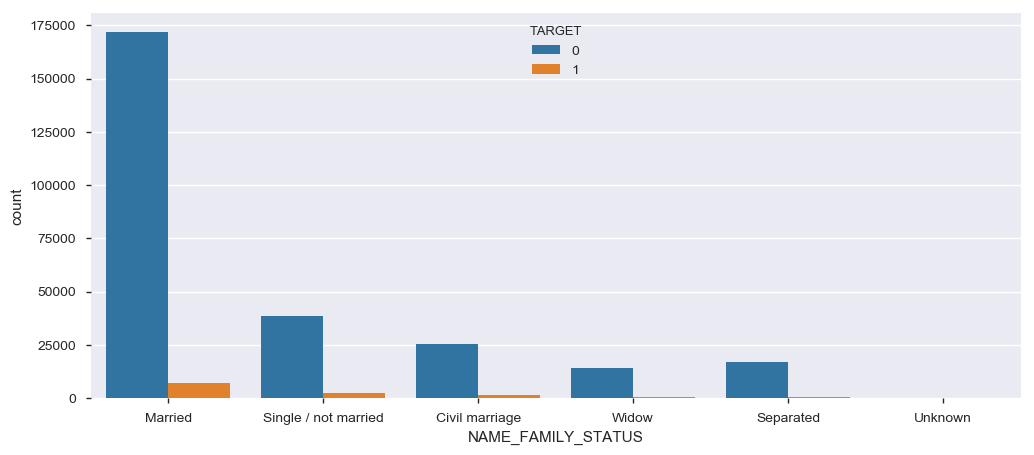

In [25]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_FAMILY_STATUS" , data= application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts()[1]/application_train.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts()[0]*100

In [26]:
# 결측치라고 판단됨
application_train[lambda x:x["NAME_FAMILY_STATUS"]=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38214,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
170484,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


- NAME_HOUSING_TYPE	: What is the housing situation of the client (renting, living with parents, ...)	
- 범주형 자료

NAME_HOUSING_TYPE
House / apartment      4.460709
With parents           7.107585
Municipal apartment    4.830368
Rented apartment       7.478475
Office apartment       3.383948
Co-op apartment        5.172414
Name: NAME_HOUSING_TYPE, dtype: float64

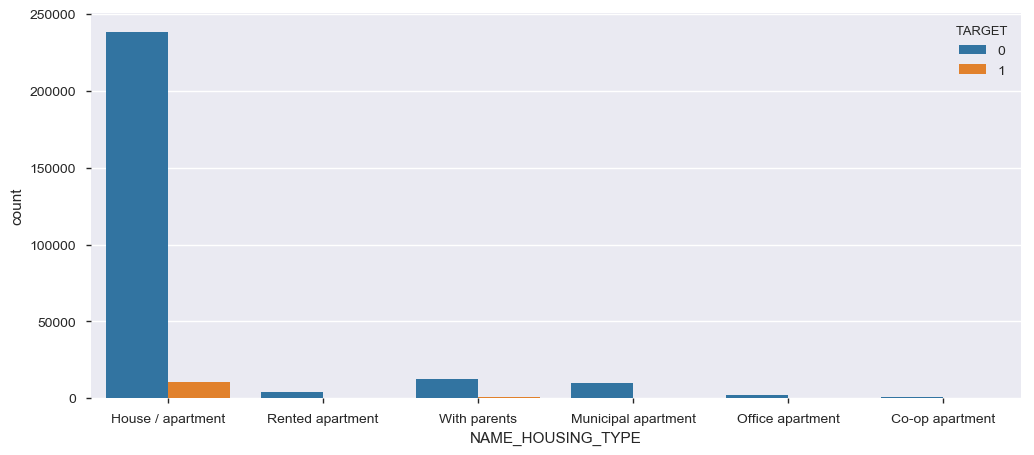

In [27]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_HOUSING_TYPE", data=application_train, hue="TARGET")
application_train.groupby("TARGET")["NAME_HOUSING_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_HOUSING_TYPE"].value_counts()[0]*100

- REGION_POPULATION_RELATIVE : Normalized population of region where client lives (higher number means the client lives in more populated region)
- 수치형자료

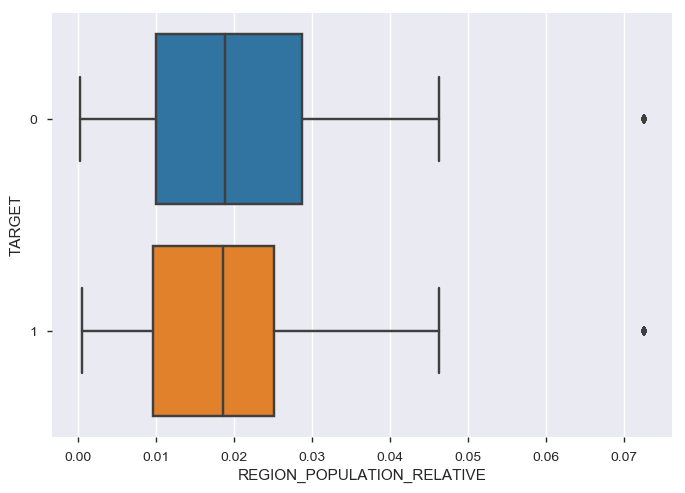

In [28]:
sns.boxplot(y= "TARGET", x = "REGION_POPULATION_RELATIVE", data = application_train, orient= "h")

- DAYS_BIRTH : Client's age in days at the time of application
- 수치형 자료
- 년도 기준으로 바꾸는 것도 고려해볼만한 요소임

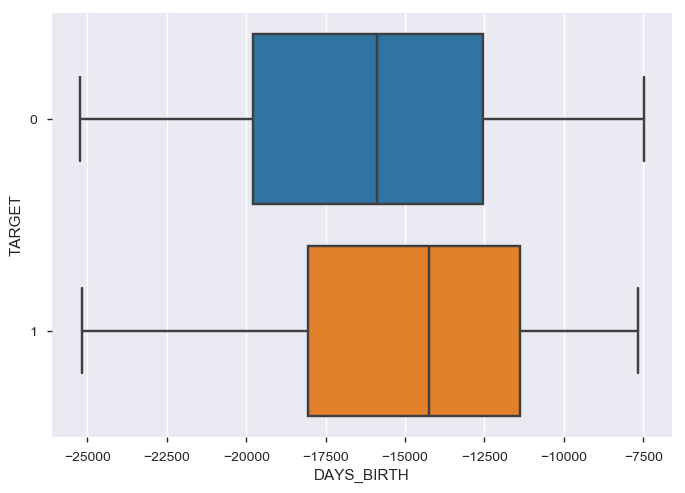

In [29]:
sns.boxplot(y= "TARGET", x = "DAYS_BIRTH", data = application_train, orient= "h")

In [30]:
app2 = application_train
app2["DAYS_BIRTH"] = application_train["DAYS_BIRTH"] / 365

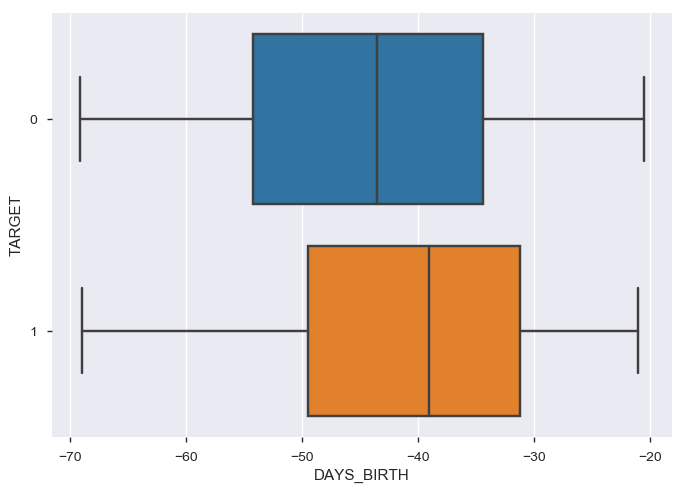

In [31]:
sns.boxplot(y= "TARGET", x = "DAYS_BIRTH", data = app2, orient= "h")

- DAYS_EMPLOYED : How many days before the application the person started current employment
- 역시 수치형 자료

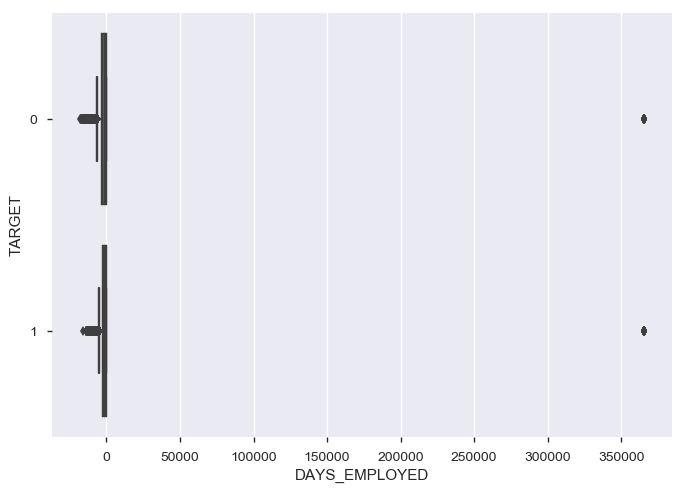

In [32]:
sns.boxplot(y= "TARGET", x = "DAYS_EMPLOYED", data = application_train, orient= "h")

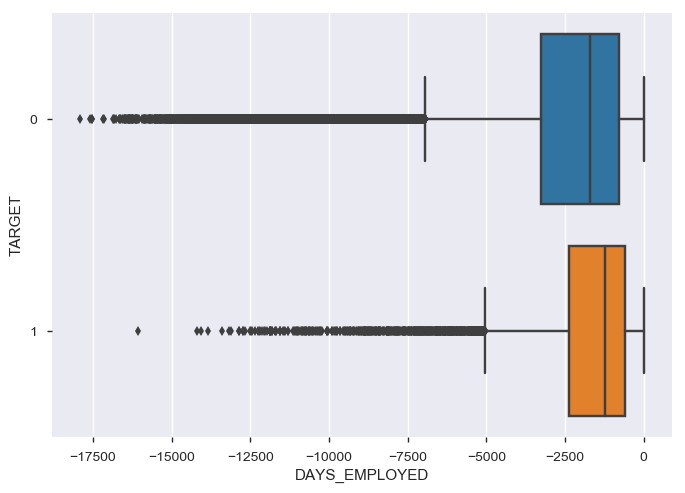

In [33]:
# 이상치 제거해보고 확인
len(application_train[lambda x:x["DAYS_EMPLOYED"] == application_train.DAYS_EMPLOYED.max()])
sns.boxplot(y= "TARGET", x = "DAYS_EMPLOYED", data = application_train[lambda x:x["DAYS_EMPLOYED"] < application_train.DAYS_EMPLOYED.max()], orient= "h")

- DAYS_REGISTRATION : How many days before the application did client change his registration
- 역시 수치형 자료, 년도 기준으로 바꿀 필요성도 있을듯

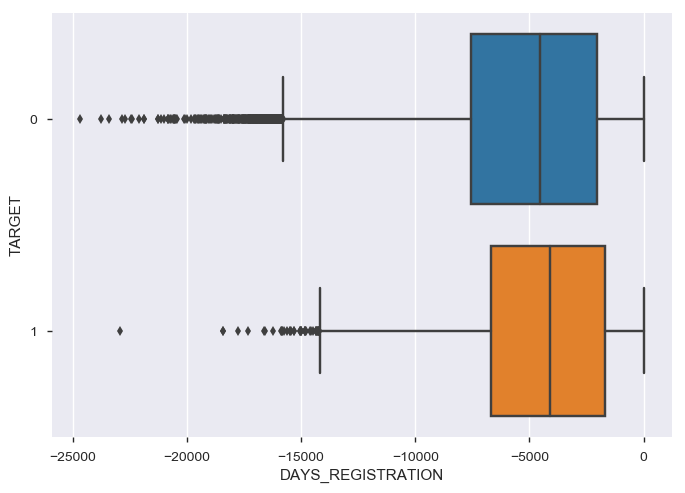

In [34]:
sns.boxplot(y= "TARGET", x = "DAYS_REGISTRATION", data = application_train, orient= "h")

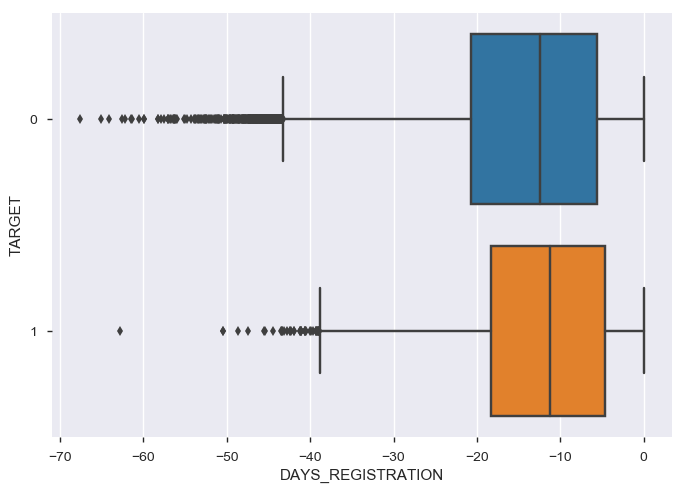

In [35]:
app2["DAYS_REGISTRATION"] = application_train["DAYS_REGISTRATION"] / 365
sns.boxplot(y= "TARGET", x = "DAYS_REGISTRATION", data = app2, orient= "h")

- DAYS_ID_PUBLISH : How many days before the application did client change the identity document with which he applied for the loan
- 역시 수치형 자료, 년도 기준으로 바꿀 필요성도 있을듯

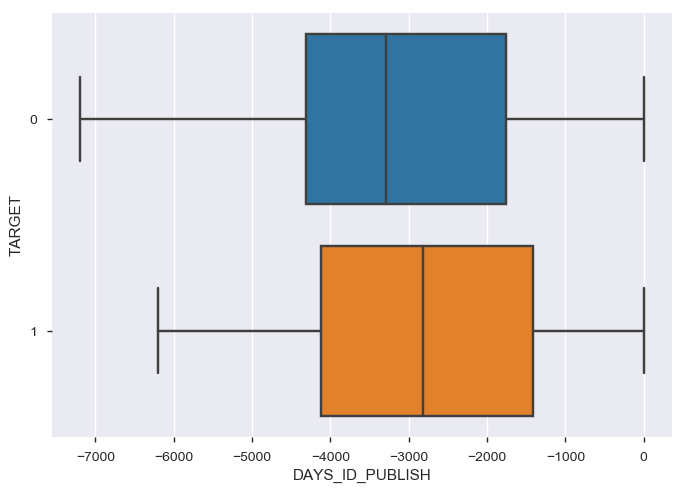

In [36]:
sns.boxplot(y= "TARGET", x = "DAYS_ID_PUBLISH", data = application_train, orient= "h")

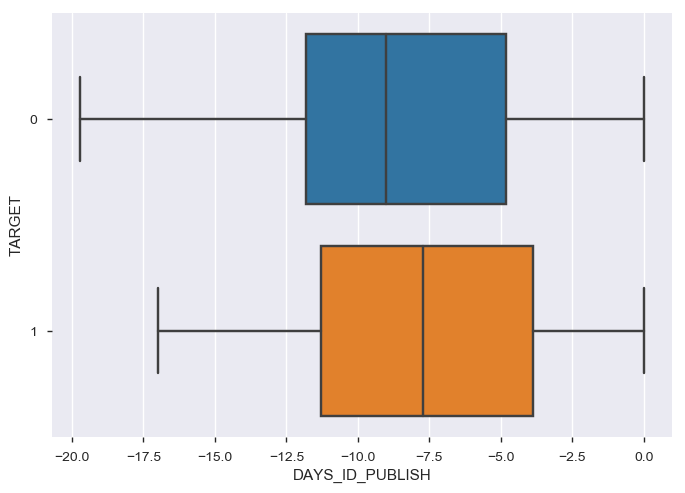

In [37]:
app2["DAYS_ID_PUBLISH"] = application_train["DAYS_ID_PUBLISH"] / 365
sns.boxplot(y= "TARGET", x = "DAYS_ID_PUBLISH", data = app2, orient= "h")

- OWN_CAR_AGE : Age of client's car
- 수치형 자료

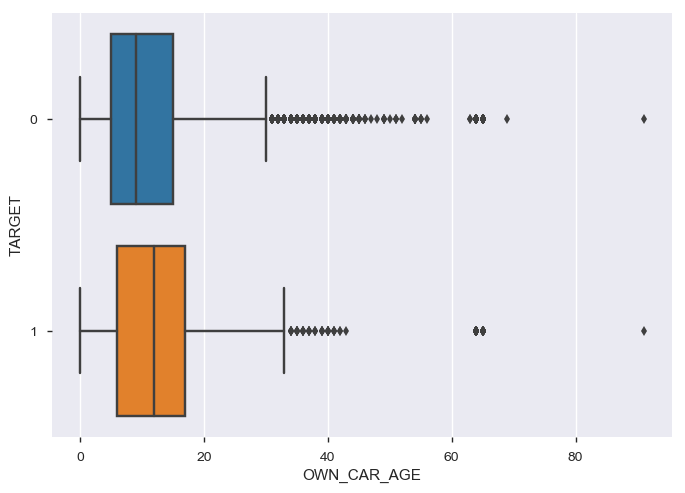

In [38]:
sns.boxplot(y= "TARGET", x = "OWN_CAR_AGE", data = application_train, orient= "h")

- FLAG_MOBIL : Did client provide mobile phone (1=YES, 0=NO)
- FLAG_EMP_PHONE : Did client provide work phone (1=YES, 0=NO)
- FLAG_WORK_PHONE : Did client provide home phone (1=YES, 0=NO)
- FLAG_CONT_MOBILE : Was mobile phone reachable (1=YES, 0=NO)
- FLAG_PHONE : Did client provide home phone (1=YES, 0=NO)
- FLAG_EMAIL : Did client provide email (1=YES, 0=NO)
- 대답 여부로 작성된 범주형 자료

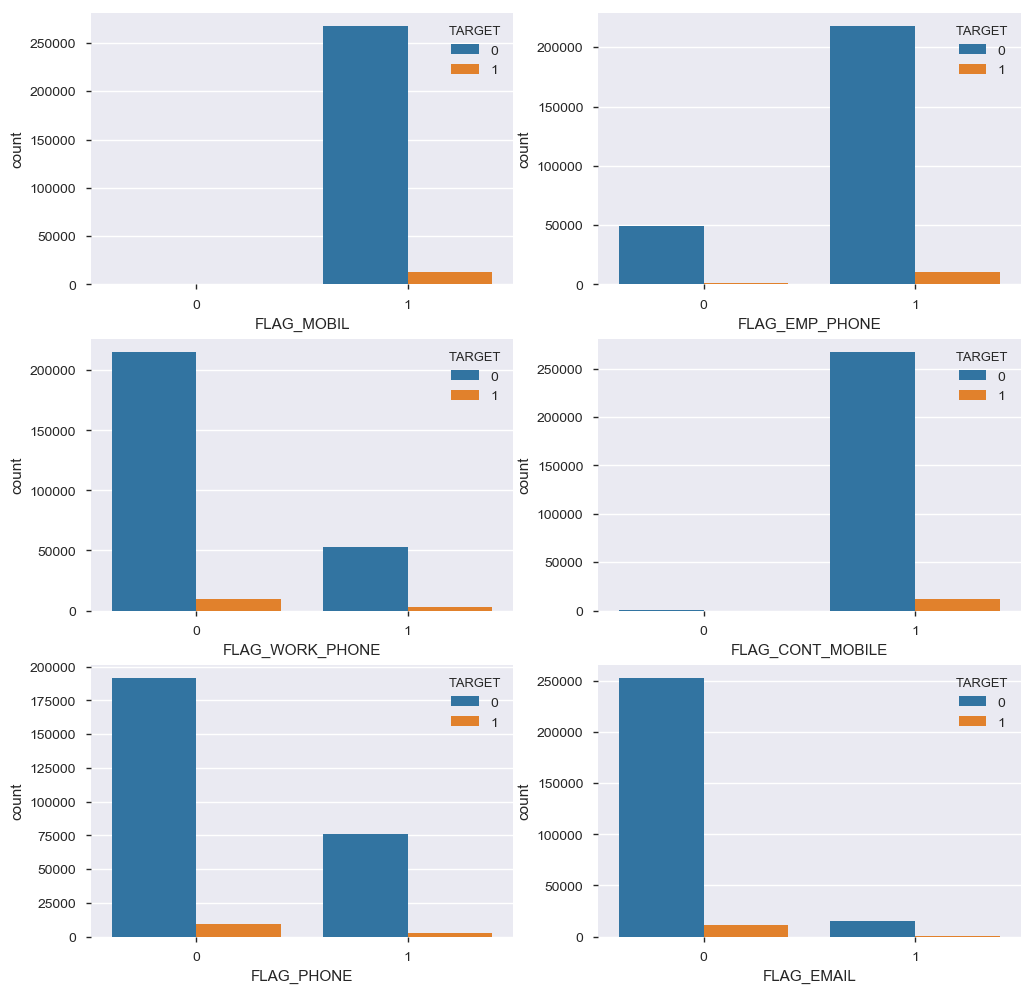

In [39]:
fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
sns.countplot("FLAG_MOBIL", hue="TARGET", data = application_train, ax=ax1)
sns.countplot("FLAG_EMP_PHONE", hue="TARGET", data = application_train, ax=ax2)
sns.countplot("FLAG_WORK_PHONE", hue="TARGET", data = application_train, ax=ax3)
sns.countplot("FLAG_CONT_MOBILE", hue="TARGET", data = application_train, ax=ax4)
sns.countplot("FLAG_PHONE", hue="TARGET", data = application_train, ax = ax5)
sns.countplot("FLAG_EMAIL", hue="TARGET", data = application_train, ax = ax6)

In [40]:
print(" ",application_train.groupby("TARGET")["FLAG_MOBIL"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_MOBIL"].value_counts()[0]*100,"\n",
application_train.groupby("TARGET")["FLAG_EMP_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_EMP_PHONE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["FLAG_WORK_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_WORK_PHONE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["FLAG_CONT_MOBILE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_CONT_MOBILE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["FLAG_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_PHONE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["FLAG_EMAIL"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_EMAIL"].value_counts()[0]*100)

  FLAG_MOBIL
0         NaN
1    4.635331
Name: FLAG_MOBIL, dtype: float64 
 FLAG_EMP_PHONE
1    5.006646
0    3.002700
Name: FLAG_EMP_PHONE, dtype: float64 
 FLAG_WORK_PHONE
0    4.379955
1    5.682662
Name: FLAG_WORK_PHONE, dtype: float64 
 FLAG_CONT_MOBILE
1    4.634736
0    4.940711
Name: FLAG_CONT_MOBILE, dtype: float64 
 FLAG_PHONE
0    4.885570
1    4.005463
Name: FLAG_PHONE, dtype: float64 
 FLAG_EMAIL
0    4.641310
1    4.535907
Name: FLAG_EMAIL, dtype: float64


- OCCUPATION_TYPE : What kind of occupation does the client have
- 범주형 자료

OCCUPATION_TYPE
Accountants               2.649757
Cleaning staff            5.392526
Cooking staff             6.536857
Core staff                3.646025
Drivers                   6.620990
HR staff                  3.807615
High skill tech staff     3.451004
IT staff                  3.648069
Laborers                  6.263485
Low-skill Laborers       10.292326
Managers                  3.352777
Medicine staff            3.818206
Private service staff     3.594080
Realty agents             4.984424
Sales staff               5.802708
Secretaries               4.467354
Security staff            6.340261
Waiters/barmen staff      6.868867
Name: OCCUPATION_TYPE, dtype: float64

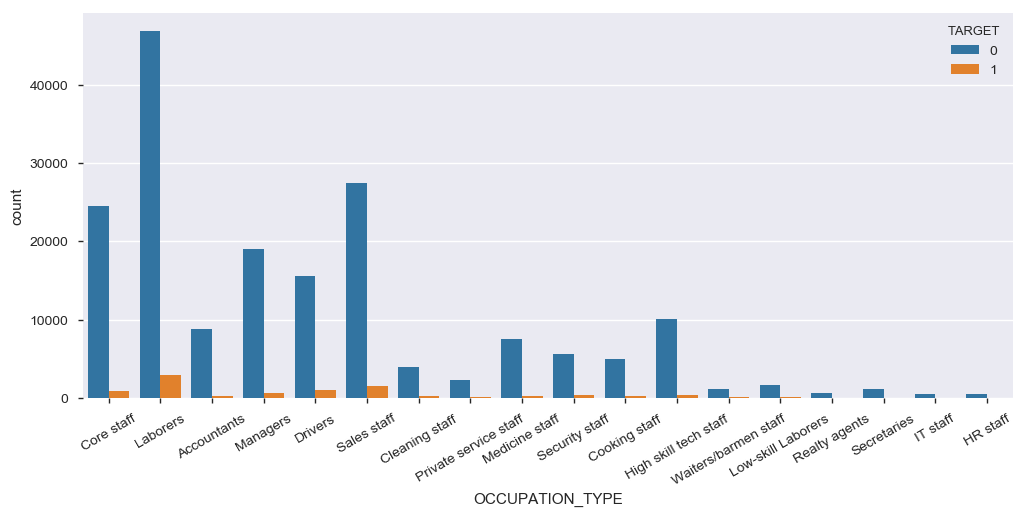

In [41]:
plt.figure(figsize=(12,5))
g = sns.countplot("OCCUPATION_TYPE", hue = "TARGET", data = application_train)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
application_train.groupby("TARGET")["OCCUPATION_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["OCCUPATION_TYPE"].value_counts()[0]*100

- CNT_FAM_MEMBERS : How many family members does client have
- 수치형 자료

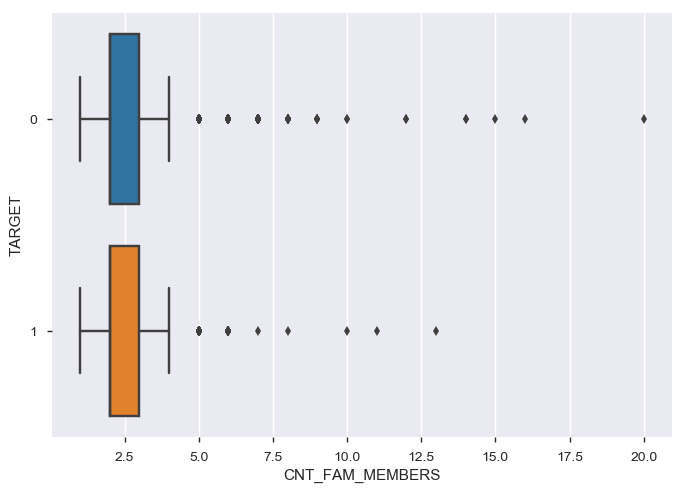

In [42]:
sns.boxplot(y= "TARGET", x = "CNT_FAM_MEMBERS", data = application_train, orient= "h")

- REGION_RATING_CLIENT : Our rating of the region where client lives (1,2,3)
- REGION_RATING_CLIENT_W_CITY : Our rating of the region where client lives with taking city into account (1,2,3)
- 범주형 자료
- 서로 크게 다른자료가 아닌 것으로 보임.


REGION_RATING_CLIENT
2    4.502476
3    6.716693
1    2.629405
Name: REGION_RATING_CLIENT, dtype: float64 
 REGION_RATING_CLIENT_W_CITY
2    4.526704
3    6.901807
1    2.638411
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


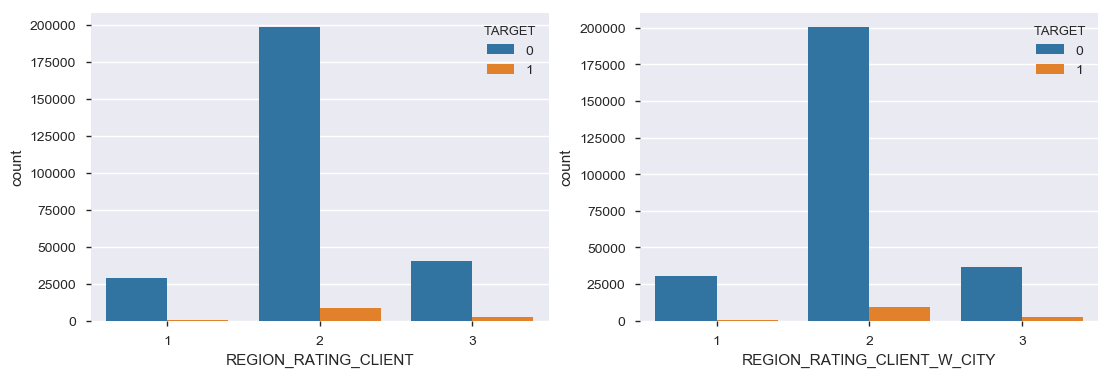

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
sns.countplot("REGION_RATING_CLIENT", hue= "TARGET",data = application_train, ax = ax1)
sns.countplot("REGION_RATING_CLIENT_W_CITY", hue= "TARGET",data = application_train, ax = ax2)
print(application_train.groupby("TARGET")["REGION_RATING_CLIENT"].value_counts()[1]/application_train.groupby("TARGET")["REGION_RATING_CLIENT"].value_counts()[0]*100,"\n",
application_train.groupby("TARGET")["REGION_RATING_CLIENT_W_CITY"].value_counts()[1]/application_train.groupby("TARGET")["REGION_RATING_CLIENT_W_CITY"].value_counts()[0]*100)

- WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for the loan
- HOUR_APPR_PROCESS_START : Approximately at what hour did the client apply for the loan
- 범주형 자료
- 요일은 큰 차이가 없지만, 대출시간은 심야시간대가 상환을 하지 못할 가능성이 높음

WEEKDAY_APPR_PROCESS_START
FRIDAY       4.643461
MONDAY       4.456831
SATURDAY     4.528212
SUNDAY       4.630347
THURSDAY     4.725482
TUESDAY      4.775953
WEDNESDAY    4.640500
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 
 HOUR_APPR_PROCESS_START
0     9.375000
1     6.493506
2     4.961832
3     4.864359
4     4.788112
5     6.171244
6     6.973899
7     6.210782
8     5.329129
9     4.858895
10    4.557494
11    4.640816
12    4.663108
13    4.508242
14    4.525149
15    4.294591
16    4.220307
17    3.563609
18    4.301754
19    3.398769
20    4.186489
21    3.977273
22    6.976744
23    9.090909
Name: HOUR_APPR_PROCESS_START, dtype: float64


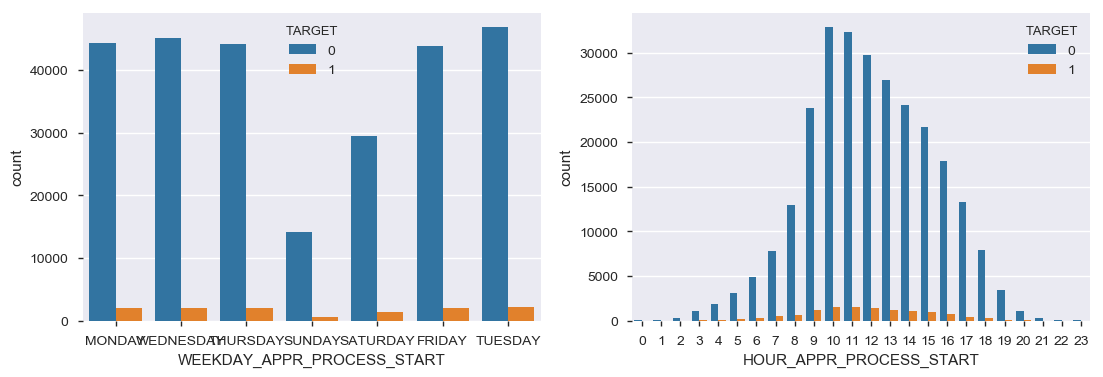

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
sns.countplot("WEEKDAY_APPR_PROCESS_START", hue= "TARGET",data = application_train, ax = ax1)
sns.countplot("HOUR_APPR_PROCESS_START", hue= "TARGET",data = application_train, ax = ax2)
print(application_train.groupby("TARGET")["WEEKDAY_APPR_PROCESS_START"].value_counts()[1]/application_train.groupby("TARGET")["WEEKDAY_APPR_PROCESS_START"].value_counts()[0]*100,"\n",
application_train.groupby("TARGET")["HOUR_APPR_PROCESS_START"].value_counts()[1]/application_train.groupby("TARGET")["HOUR_APPR_PROCESS_START"].value_counts()[0]*100)

- REG_REGION_NOT_LIVE_REGION : Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
- REG_REGION_NOT_WORK_REGION : Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
- LIVE_REGION_NOT_WORK_REGION : Flag if client's contact address does not match work address (1=different, 0=same, at region level)
- REG_CITY_NOT_LIVE_CITY : Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
- REG_CITY_NOT_WORK_CITY : Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
- LIVE_CITY_NOT_WORK_CITY : Flag if client's contact address does not match work address (1=different, 0=same, at city level)
- 등록기준지와 같은지 다른지 여부를 코드화 시켜놓은 범주형 자료


  REG_REGION_NOT_LIVE_REGION
0    4.623031
1    5.444555
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64 
 REG_REGION_NOT_WORK_REGION
0    4.609456
1    5.123636
Name: REG_REGION_NOT_WORK_REGION, dtype: float64 
 LIVE_REGION_NOT_WORK_REGION
0    4.625713
1    4.862969
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64 
 REG_CITY_NOT_LIVE_CITY
0    4.387965
1    7.707342
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64 
 REG_CITY_NOT_WORK_CITY
0    4.149018
1    6.318297
Name: REG_CITY_NOT_WORK_CITY, dtype: float64 
 LIVE_CITY_NOT_WORK_CITY
0    4.382698
1    5.818792
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


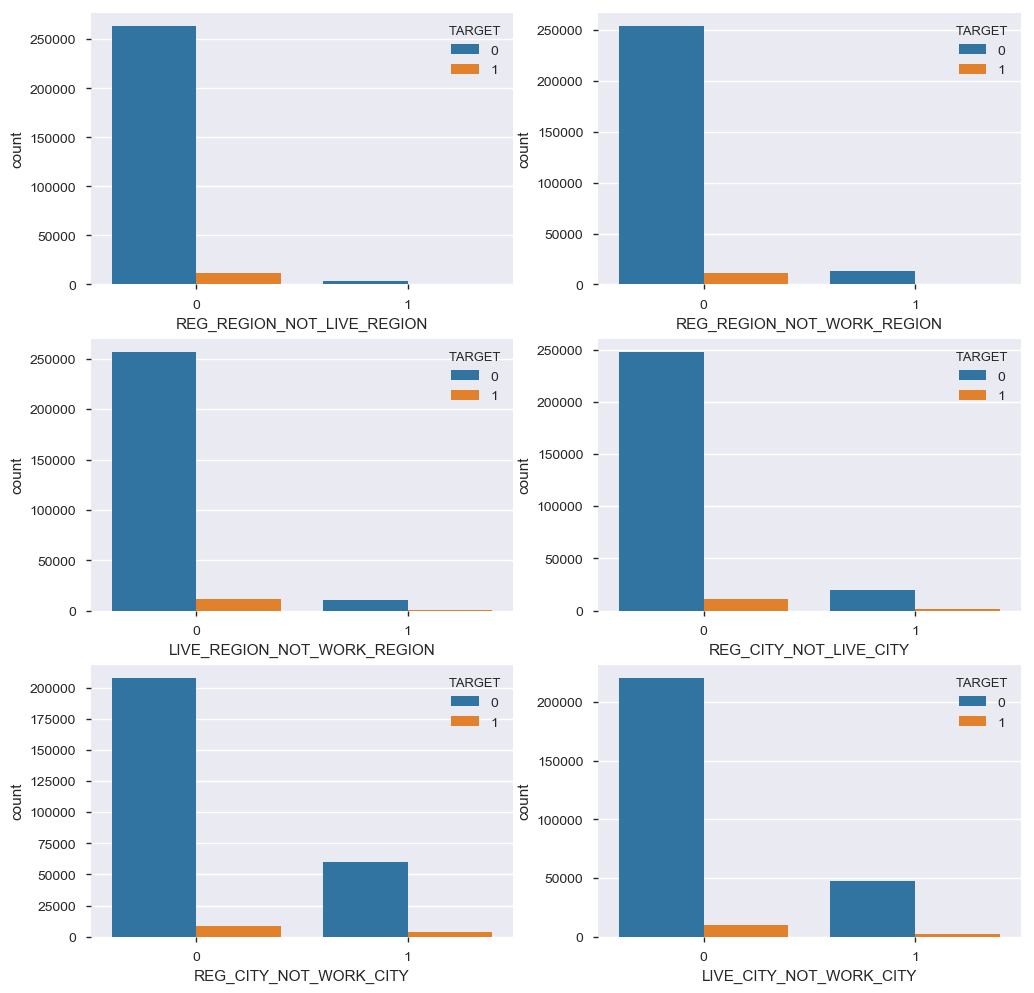

In [45]:
fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
sns.countplot("REG_REGION_NOT_LIVE_REGION", hue="TARGET", data = application_train, ax=ax1)
sns.countplot("REG_REGION_NOT_WORK_REGION", hue="TARGET", data = application_train, ax=ax2)
sns.countplot("LIVE_REGION_NOT_WORK_REGION", hue="TARGET", data = application_train, ax=ax3)
sns.countplot("REG_CITY_NOT_LIVE_CITY", hue="TARGET", data = application_train, ax=ax4)
sns.countplot("REG_CITY_NOT_WORK_CITY", hue="TARGET", data = application_train, ax = ax5)
sns.countplot("LIVE_CITY_NOT_WORK_CITY", hue="TARGET", data = application_train, ax = ax6)
print(" ",application_train.groupby("TARGET")["REG_REGION_NOT_LIVE_REGION"].value_counts()[1]/application_train.groupby("TARGET")["REG_REGION_NOT_LIVE_REGION"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["REG_REGION_NOT_WORK_REGION"].value_counts()[1]/application_train.groupby("TARGET")["REG_REGION_NOT_WORK_REGION"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["LIVE_REGION_NOT_WORK_REGION"].value_counts()[1]/application_train.groupby("TARGET")["LIVE_REGION_NOT_WORK_REGION"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["REG_CITY_NOT_LIVE_CITY"].value_counts()[1]/application_train.groupby("TARGET")["REG_CITY_NOT_LIVE_CITY"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["REG_CITY_NOT_WORK_CITY"].value_counts()[1]/application_train.groupby("TARGET")["REG_CITY_NOT_WORK_CITY"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["LIVE_CITY_NOT_WORK_CITY"].value_counts()[1]/application_train.groupby("TARGET")["LIVE_CITY_NOT_WORK_CITY"].value_counts()[0]*100)

- ORGANIZATION_TYPE : Type of organization where client works
- 범주형 자료

ORGANIZATION_TYPE
Advertising               4.582210
Agriculture               5.722461
Bank                      2.991071
Business Entity Type 1    4.308521
Business Entity Type 2    5.009297
Business Entity Type 3    5.409522
Cleaning                  7.272727
Construction              7.051962
Culture                   2.608696
Electricity               4.415274
Emergency                 4.285714
Government                3.721082
Hotel                     3.877791
Housing                   4.804339
Industry: type 1          6.689342
Industry: type 10         4.040404
Industry: type 11         5.014875
Industry: type 12         2.402402
Industry: type 13         7.142857
Industry: type 2          3.950617
Industry: type 3          6.191505
Industry: type 4          5.200000
Industry: type 5          4.030710
Industry: type 6          4.040404
Industry: type 7          4.493392
Industry: type 8          5.000000
Industry: type 9          3.616879
Insurance                 2.656546
Ki

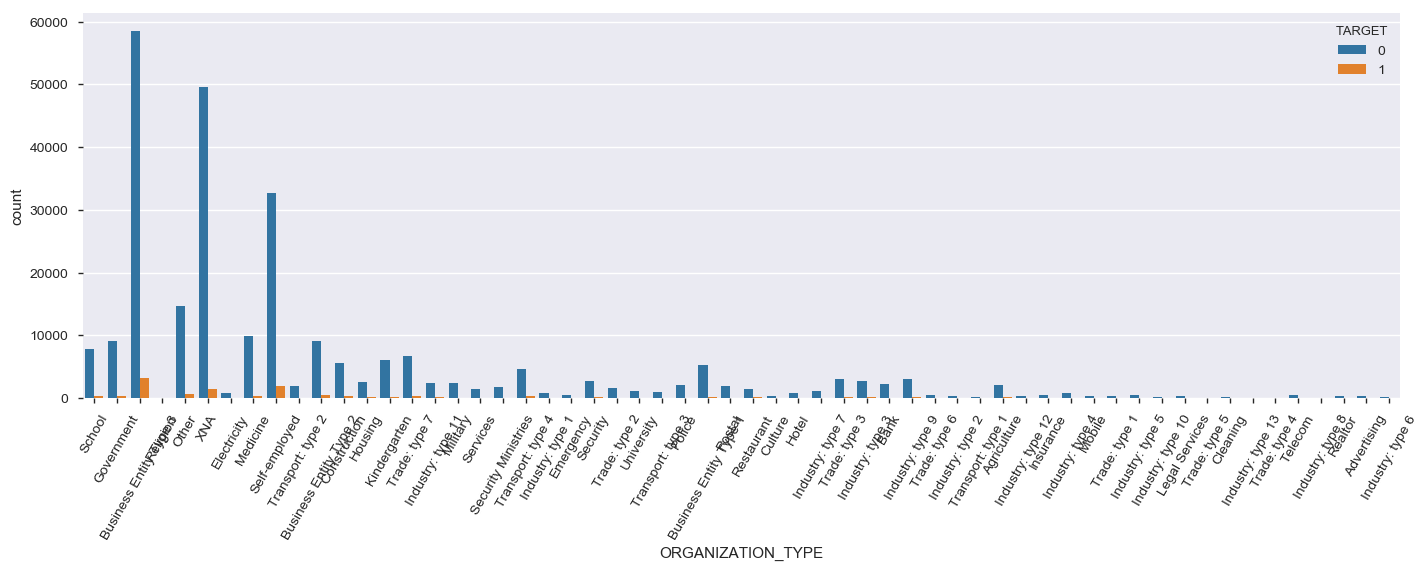

In [46]:
plt.figure(figsize=(17,5))
g = sns.countplot("ORGANIZATION_TYPE", hue="TARGET", data=application_train)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
application_train.groupby("TARGET")["ORGANIZATION_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["ORGANIZATION_TYPE"].value_counts()[0]*100

- EXT_SOURCE_1 : Normalized score from external data source
- EXT_SOURCE_2 : Normalized score from external data source
- EXT_SOURCE_3 : Normalized score from external data source
- 외부 신용평가사(ex. FICO)에서 수집한 외부 정보.
- 0 ~ 1 사이의 값으로 구성된 수치형 자료

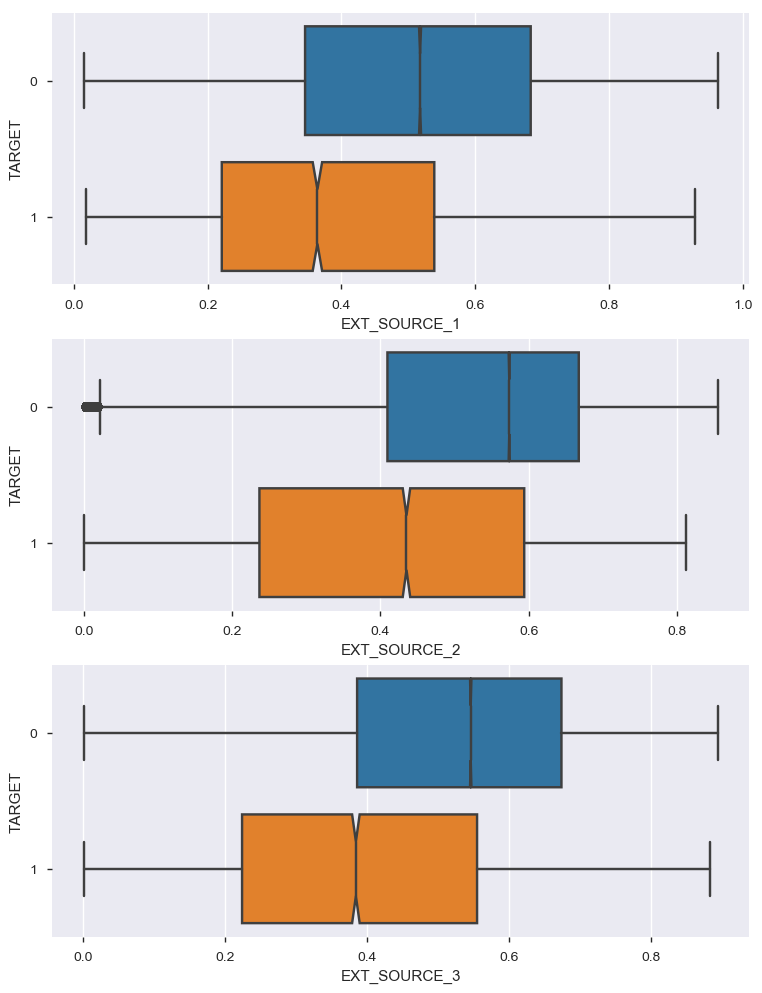

In [47]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(9,12))
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_1", data = application_train, orient= "h", notch=True, ax= ax1)
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_2", data = application_train, orient= "h", notch=True, ax= ax2)
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_3", data = application_train, orient= "h", notch=True, ax= ax3)

- 다른주거지 관련 정보에 대한 정보는 NA의 비율이 지나치게 높으므로 제거함. 

- OBS_30_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings with observable 30 DPD (days past due) default
- DEF_30_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
- OBS_60_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings with observable 60 DPD (days past due) default
- DEF_60_CNT_SOCIAL_CIRCLE : How many observation of client's social surroundings defaulted on 60 (days past due) DPD
- 수치형 변수 관련이 있는 자료로 보임

  OBS_30_CNT_SOCIAL_CIRCLE
0.0        4.575022
1.0        4.531452
2.0        4.660658
3.0        4.733560
4.0        5.113544
5.0        4.805603
6.0        5.000000
7.0        5.453578
8.0        4.379845
9.0        4.739884
10.0       4.962153
11.0       4.931507
12.0       5.714286
13.0       6.916427
14.0       4.910714
15.0       3.333333
16.0       6.034483
17.0       3.846154
18.0            NaN
19.0       2.702703
20.0       8.000000
21.0            NaN
22.0      10.526316
23.0            NaN
24.0            NaN
25.0      10.000000
26.0            NaN
27.0            NaN
28.0            NaN
29.0            NaN
30.0     100.000000
47.0            NaN
348.0           NaN
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64 
 DEF_30_CNT_SOCIAL_CIRCLE
0.0      4.462161
1.0      5.861611
2.0      6.842224
3.0      8.157100
4.0     10.194175
5.0      4.545455
6.0     10.000000
7.0           NaN
8.0           NaN
34.0          NaN
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 
 OBS_60_CNT

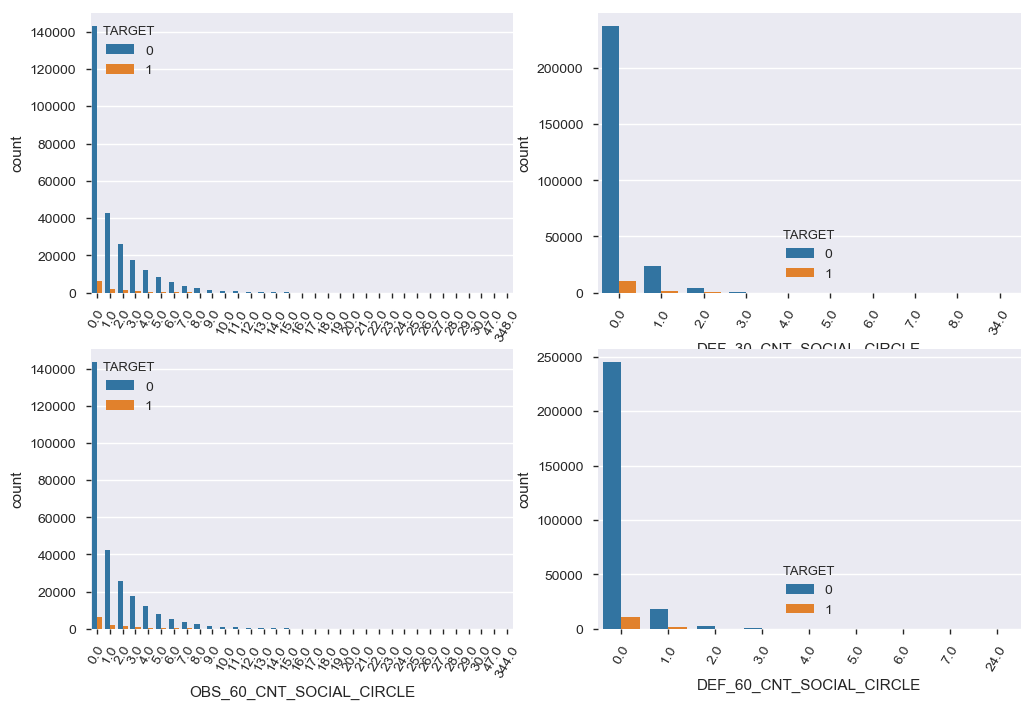

In [52]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2,2, figsize=(12,8))
g = sns.countplot("OBS_30_CNT_SOCIAL_CIRCLE", hue = "TARGET", data = application_train, ax = ax1)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g = sns.countplot("DEF_30_CNT_SOCIAL_CIRCLE", hue = "TARGET", data = application_train, ax = ax2)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g = sns.countplot("OBS_60_CNT_SOCIAL_CIRCLE", hue = "TARGET", data = application_train, ax = ax3)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g = sns.countplot("DEF_60_CNT_SOCIAL_CIRCLE", hue = "TARGET", data = application_train, ax = ax4)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
print(" ",application_train.groupby("TARGET")["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()[1]/application_train.groupby("TARGET")["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()[1]/application_train.groupby("TARGET")["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts()[1]/application_train.groupby("TARGET")["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts()[0]*100,"\n",
     application_train.groupby("TARGET")["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()[1]/application_train.groupby("TARGET")["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()[0]*100)

- DAYS_LAST_PHONE_CHANGE : How many days before application did client change phone
- 수치형 자료

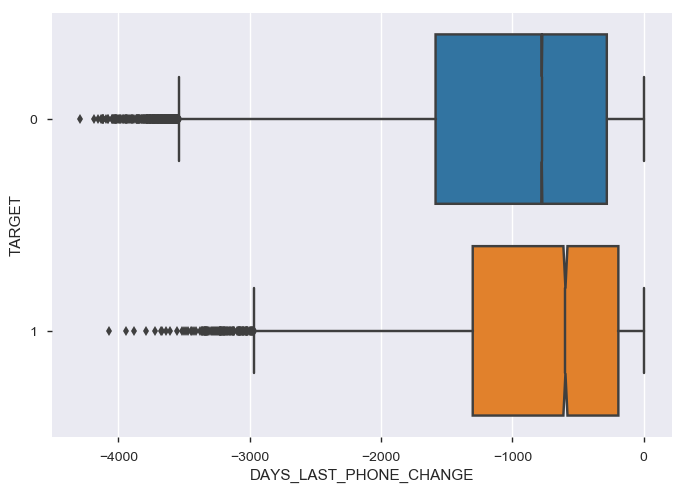

In [49]:
sns.boxplot(y= "TARGET", x = "DAYS_LAST_PHONE_CHANGE", data = application_train, orient= "h", notch=True)

- AMT_REQ_CREDIT_BUREAU_HOUR : Number of enquiries to Credit Bureau about the client one hour before application
- AMT_REQ_CREDIT_BUREAU_DAY : Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
- AMT_REQ_CREDIT_BUREAU_WEEK : Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
- AMT_REQ_CREDIT_BUREAU_MON : Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
- AMT_REQ_CREDIT_BUREAU_QRT : Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
- AMT_REQ_CREDIT_BUREAU_YEAR : Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
- 수치형 자료


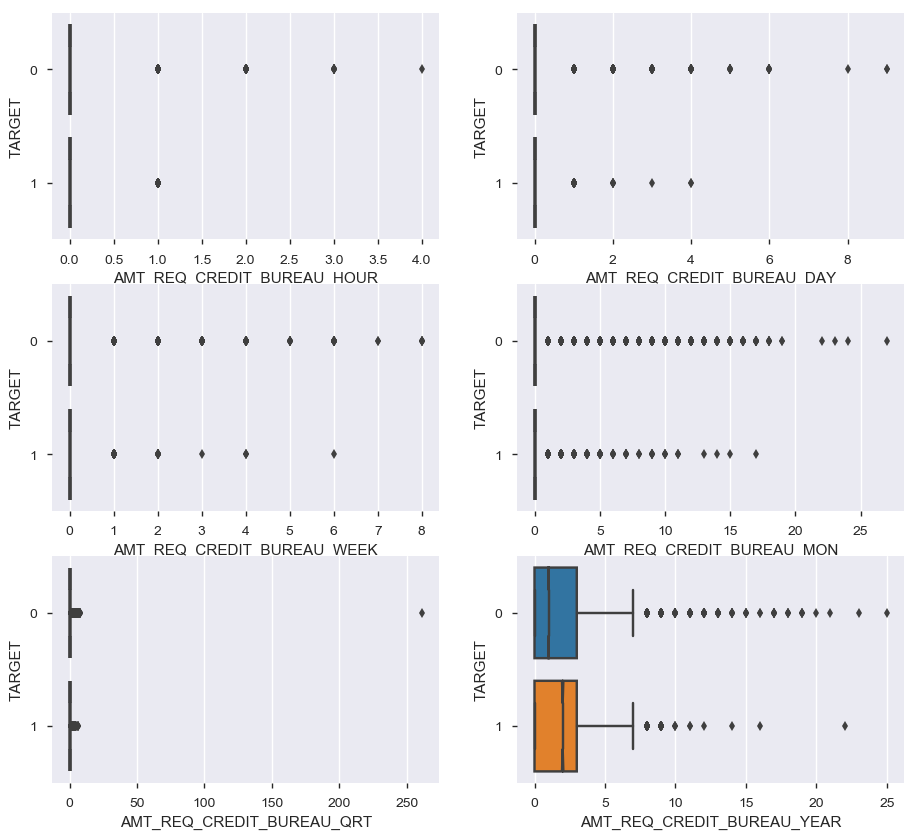

In [51]:
fig, [(ax1,ax2), (ax3,ax4), (ax5,ax6)] = plt.subplots(3,2,figsize=(11,10))
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_HOUR", data = application_train, orient= "h", notch=True, ax = ax1)
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_DAY", data = application_train, orient= "h", notch=True, ax = ax2)
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_WEEK", data = application_train, orient= "h", notch=True, ax = ax3)
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_MON", data = application_train, orient= "h", notch=True, ax = ax4)
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_QRT", data = application_train, orient= "h", notch=True, ax = ax5)
sns.boxplot(y= "TARGET", x = "AMT_REQ_CREDIT_BUREAU_YEAR", data = application_train, orient= "h", notch=True, ax = ax6)